<a href="https://colab.research.google.com/github/ApoorvaGowda27/House-Price-Prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Housing.csv')  # Replace with your actual file name

# Display the first few rows of the dataset
df.head()

# Check for missing values
print(df.isnull().sum())

# Verify data types
print(df.dtypes)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [8]:
# Step 3: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify the data types after conversion
print("Data types after one-hot encoding:")
print(df.dtypes)

# Step 4: Check the DataFrame structure
print("DataFrame structure:")
print(df.head())

# Step 5: Select relevant features
if 'price' in df.columns:
    X = df.drop('price', axis=1)  # Features
    y = df['price']                # Target variable
else:
    raise ValueError("Target variable 'price' not found in the DataFrame")

# Check the shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Data types after one-hot encoding:
price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object
DataFrame structure:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3    

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1754318687330.6677
R-squared: 0.6529242642153177


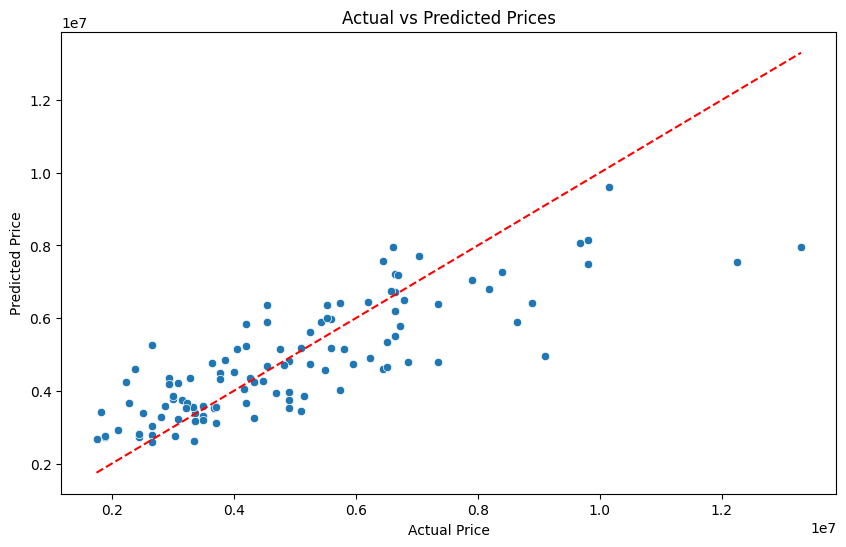

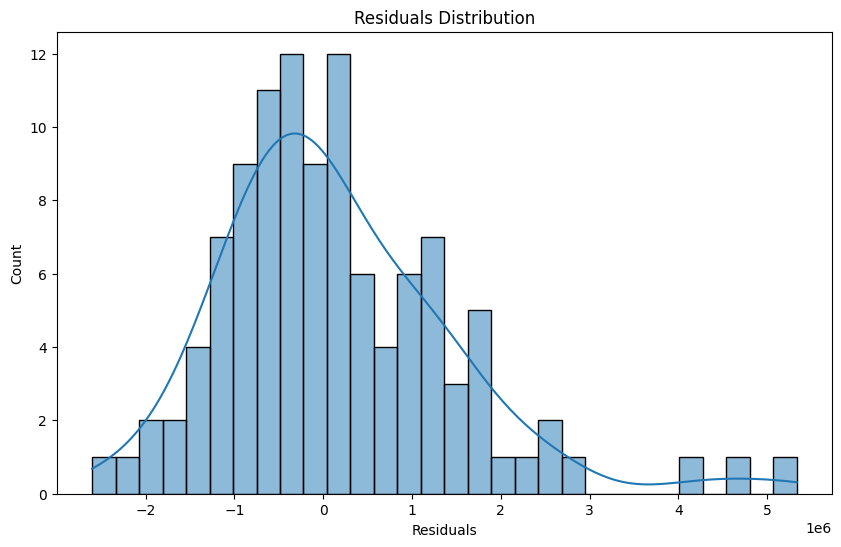

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of equality
plt.show()

# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()
